In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf

# Preprocessing Test.csv

Uploading test.csv

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv


load test.csv to data_test variable

In [ ]:
data_test = pd.read_csv('/content/test.csv')

Assigning numbers for category features

In [ ]:
data_test.category[data_test.category == 'A'] = 1
data_test.category[data_test.category == 'B'] = 2
data_test.category[data_test.category == 'C'] = 3
data_test.category[data_test.category == 'D'] = 4
data_test.category[data_test.category == 'E'] = 5
data_test.category[data_test.category == 'F'] = 6
data_test.category[data_test.category == 'G'] = 7
data_test.category[data_test.category == 'H'] = 8
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

convert string values to integers

In [ ]:
data_test["views"]=pd.to_numeric(data_test["views"])
data_test["comment"]=pd.to_numeric(data_test["comment"])
data_test["likes"]=pd.to_numeric(data_test["likes"])
data_test["dislikes"]=pd.to_numeric(data_test["dislikes"])
#data_train["adview"]=pd.to_numeric(data_train["adview"])

Encoding non-numerical features

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])

In [ ]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


Drop the vidid category

In [ ]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,2115,2
1,1040132,8171,340,1047,1825,2055,6
2,28534,31,11,1,1009,1506,4
3,1316715,2284,250,274,116,2265,7
4,1893173,2519,225,116,1892,1625,2


Coverting time in seconds

In [ ]:
test=pd.read_csv("test.csv")
mp = pd.read_csv("/content/test.csv")["duration"]
time = mp.apply(checki)

time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,449.0,6
1,1707,56,2,6,2185,389.0,4
2,2023,25,0,2,2094,2274.0,3
3,620860,777,161,153,2119,595.0,8
4,666,1,0,0,2091,188.0,4


HeatMap

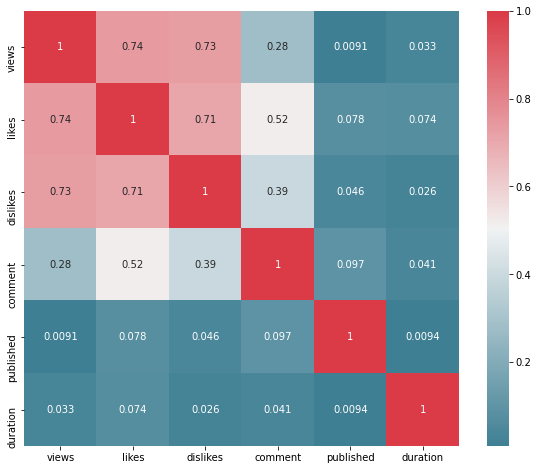

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_test.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax,annot=True)
plt.show()

In [ ]:
print(data_train)

         views  likes  dislikes  comment  published  duration category
0      1031602   8523       363     1095       2168     449.0        6
1         1707     56         2        6       2185     389.0        4
2         2023     25         0        2       2094    2274.0        3
3       620860    777       161      153       2119     595.0        8
4          666      1         0        0       2091     188.0        4
...        ...    ...       ...      ...        ...       ...      ...
14994   525949   1137        83       86       1683       NaN        1
14995   665673   3849       156      569       1838       NaN        4
14996     3479     16         1        1       1053       NaN        2
14997      963      0         0        0        222       NaN        7
14998    15212     22         5        4       1960       NaN        4

[14636 rows x 7 columns]


# Predicting and saving results

load processed dataset to x

In [ ]:
x=data_test

Make sure the array is uniform 

In [ ]:
x = np.asarray(x).astype(np.float32)

convert numpy array to tensor

In [ ]:
data_test_tensor = tf.convert_to_tensor(x)


Load ANN model And run model 

In [ ]:
model = keras.models.load_model('/content/ann_youtubeadview.h5')


Run Model Prediction

In [ ]:
test_predictions = model.predict(x).flatten()

Print predicted value

In [ ]:
print(test_predictions)

[2.4132952e+08 5.7022029e+08 1.2997855e+07 ... 1.0343924e+09 3.9009898e+08
 5.1379115e+06]


Add the adview value to data test file

In [ ]:
data = data_test
df = pd.DataFrame(data)
df['adview'] = predictions
df.head()

,views,likes,dislikes,comment,published,duration,category,adview
0,440238,6153,218,1377,2053,2115,2,2.413295e+08
1,1040132,8171,340,1047,1825,2055,6,5.702203e+08
2,28534,31,11,1,1009,1506,4,1.299786e+07
3,1316715,2284,250,274,116,2265,7,7.160900e+08
4,1893173,2519,225,116,1892,1625,2,1.035128e+09


write the predicted values to PredictedAdview.csv

In [ ]:
#data = x
df = pd.DataFrame(predictions)
#df['adview'] = predictions
df.head()
print(predictions)

[[2.4132952e+08]
 [5.7022029e+08]
 [1.2997855e+07]
 ...
 [1.0343924e+09]
 [3.9009898e+08]
 [5.1379115e+06]]


In [ ]:
data = data_test
df = pd.DataFrame(data)
df['adview'] = predictions
df.head()

,views,likes,dislikes,comment,published,duration,category,adview
0,440238,6153,218,1377,2053,2115,2,2.413295e+08
1,1040132,8171,340,1047,1825,2055,6,5.702203e+08
2,28534,31,11,1,1009,1506,4,1.299786e+07
3,1316715,2284,250,274,116,2265,7,7.160900e+08
4,1893173,2519,225,116,1892,1625,2,1.035128e+09


In [ ]:
df.to_csv('Predictedadview.csv')